<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Data</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Analysis/Modeling" data-toc-modified-id="Analysis/Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis/Modeling</a></span><ul class="toc-item"><li><span><a href="#Securities-Table" data-toc-modified-id="Securities-Table-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Securities Table</a></span><ul class="toc-item"><li><span><a href="#Summary-of-Securities" data-toc-modified-id="Summary-of-Securities-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Summary of Securities</a></span></li></ul></li><li><span><a href="#Prices-split-adjusted" data-toc-modified-id="Prices-split-adjusted-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prices-split-adjusted</a></span><ul class="toc-item"><li><span><a href="#Prices-adjusted-split-Summary" data-toc-modified-id="Prices-adjusted-split-Summary-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Prices-adjusted-split Summary</a></span></li></ul></li><li><span><a href="#Securities-&amp;-Prices" data-toc-modified-id="Securities-&amp;-Prices-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Securities &amp; Prices</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusions-and-Next-Steps" data-toc-modified-id="Conclusions-and-Next-Steps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions and Next Steps</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

The purpose of this notebook is to the explore the [New York Stock Exchange](https://www.kaggle.com/dgawlik/nyse/data#) presented on Kaggle. We will use this Notebook to explore trends in the data before applying statistical methods for predictions.

## The Data

As explained in the introduction, the data is the [New York Stock Exchange](https://www.kaggle.com/dgawlik/nyse/data#) dataset presented on Kaggle. Characteristics of the data are below

- 4 CSV Files: prices.csv, prices-split-adjusted.csv, securities.csv, fundamentals.csv
- Sources: Yahoo Finance, NASDAQ Financials, EDGAR SEC

**prices.csv:** raw, as-is daily prices. Data spans from 2010 to the end of 2016. New companies have a stock market date range that is shorter. There are approximately 140 stock splits in that time.

**prices-split-adjust.csv:** Same as prices, but added adjustments for splits

**securities.csv**: general description of each company with division on sectors

**fundamentals.csv** metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of fundamental indicators. 



### Imports

Import libraries and write settings here.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Analysis/Modeling

We will be exploring our data between three tables **prices-split-adjust**, **securites**, and **fundamentals**. The easiest to analyze is the **securities** table. We will begin our analysis here.

## Securities Table

In the securities table we are given a general description of a company. The variables that I believe are of interest are shown below, along with a general description.
   - Ticker Symbol: This is the unique identifier for a company (string)
   - GICS Sector: The business sector that the company is in i.e. health care (string)
   - GICS Sub Industry: A sub industry of the sector a company is in. i.e. Pharmaceuticals for a health care company. (string)
   - Address of Headquarters: City,State of the headquarters (string)
   - Date first added: Date of when the company was added to the New York Stock Market (date)

In [2]:
sec = pd.read_csv('data/securities.csv',parse_dates=True)
sec.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",8/31/2015,718877


In [3]:
sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


Above we can already begin to discern some information
   - 505 unique companies
   - There are a good amount of companies that are missing data in the date first added column
   
Let's explore the data a little further and look at the **GICS Sector** and **GICS Sub Industry** columns

In [4]:
# Lets do list comprehension to save the unique industries and their counts
sector_count_dict = sec['GICS Sector'].value_counts().to_dict()

Total of 11 different industries

Consumer Discretionary: 85
Industrials: 69
Information Technology: 68
Financials: 64
Health Care: 59
Consumer Staples: 37
Energy: 36
Real Estate: 29
Utilities: 28
Materials: 25
Telecommunications Services: 5


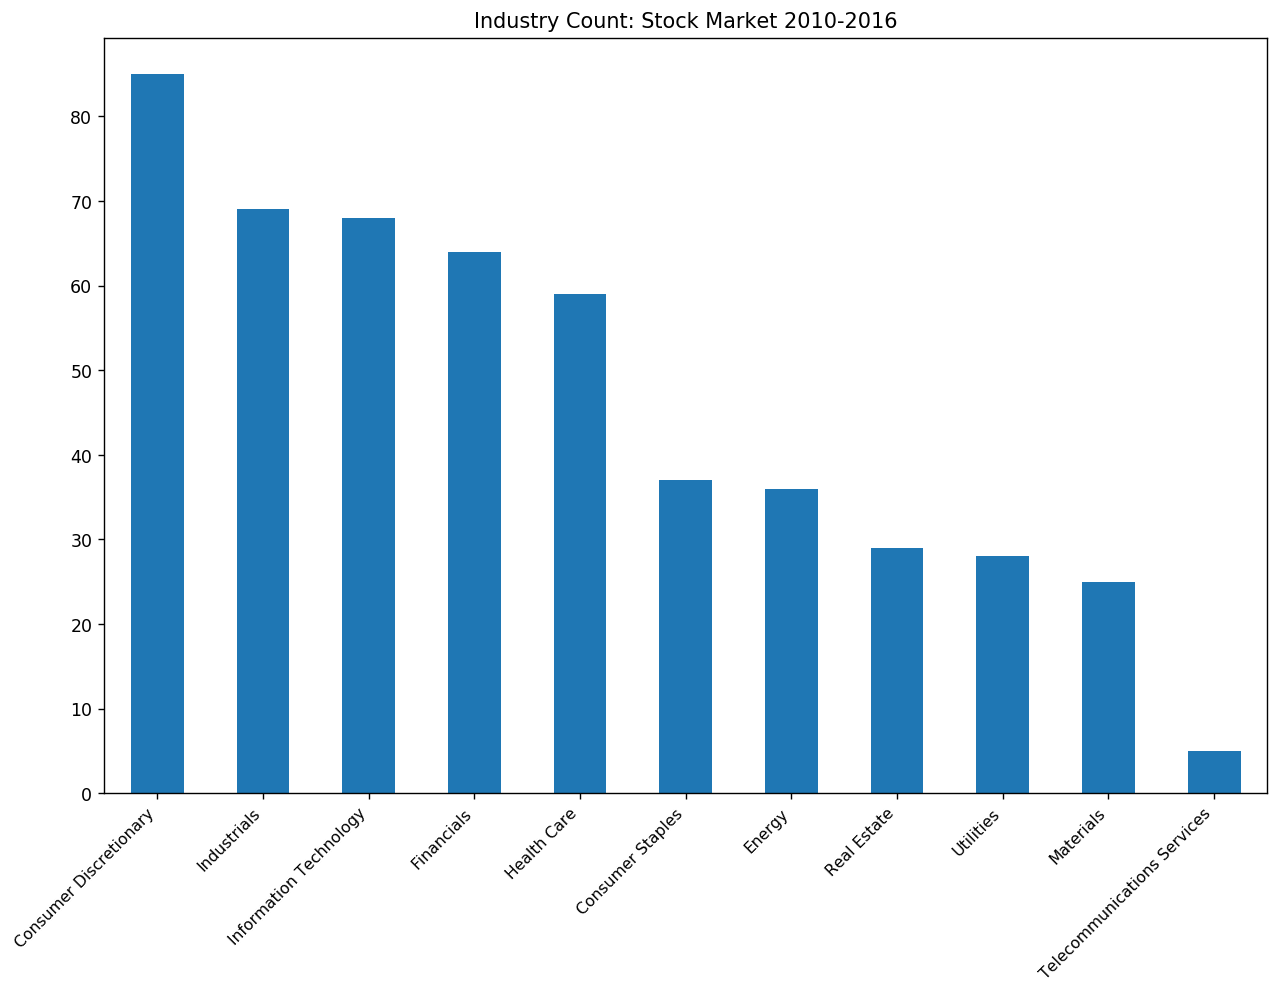

In [5]:
# Lets plot the above figure
fig = plt.figure(figsize=(12,8),dpi=125)
ax = sec['GICS Sector'].value_counts().plot(kind='bar')
ax.set_xticklabels(labels=sec['GICS Sector'].value_counts().index,rotation=45,ha='right',fontsize=9)
ax.set_title('Industry Count: Stock Market 2010-2016')

# In-Depth Text Analysis
print(f'Total of {len(sector_count_dict)} different industries')
print()
for key,value in sector_count_dict.items():
    print(f'{key}: {value}')

In [6]:
# What is consumer discretionary?
sec[sec['GICS Sector']=='Consumer Discretionary']['GICS Sub Industry'].value_counts()

Apparel, Accessories & Luxury Goods    10
Specialty Stores                        9
Apparel Retail                          6
Publishing                              5
Broadcasting & Cable TV                 5
Restaurants                             5
General Merchandise Stores              4
Cable & Satellite                       4
Internet & Direct Marketing Retail      4
Hotels, Resorts & Cruise Lines          4
Household Appliances                    3
Homebuilding                            3
Consumer Electronics                    2
Leisure Products                        2
Home Improvement Retail                 2
Advertising                             2
Department Stores                       2
Automobile Manufacturers                2
Auto Parts & Equipment                  2
Home Furnishings                        1
Housewares & Specialties                1
Computer & Electronics Retail           1
Tires & Rubber                          1
Automotive Retail                 

In [7]:
sec['GICS Sub Industry'].value_counts()

Industrial Conglomerates                       21
Internet Software & Services                   20
Oil & Gas Exploration & Production             18
Health Care Equipment                          17
REITs                                          16
                                               ..
Copper                                          1
Electronic Manufacturing Services               1
Trucking                                        1
Technology, Hardware, Software and Supplies     1
Housewares & Specialties                        1
Name: GICS Sub Industry, Length: 124, dtype: int64

I would have loved to get to lower level of granularity while exploring GICS Sub Industries, however, there are too many to list at the moment. Lets move on and see if we can feature engineer the address

In [8]:
sec['Address of Headquarters'].value_counts()

New York, New York           47
Houston, Texas               19
Atlanta, Georgia             13
Dublin, Ireland              10
San Francisco, California     9
                             ..
Creve Coeur, Missouri         1
Austin, Minnesota             1
St Louis, Missouri            1
Lowell, Arkansas              1
Winona, Minnesota             1
Name: Address of Headquarters, Length: 264, dtype: int64

In [9]:
# There are too many different addresses, 264 in fact
# Lets address this feature to go to a higher level
# of granularity

s = sec['Address of Headquarters'].str.split(', ',expand=True).loc[:,1]

# Some values have a '[' that also needs to be split.
# So we split the string again
s = s.str.split('[',expand=True)[0]

# Now we can view the headquarters location
# At a higher level of granularity
sec['Headquarters Location'] = s
sec.drop('Address of Headquarters',axis=1,inplace=True)
sec

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Date first added,CIK,Headquarters Location
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,NaN,66740,Minnesota
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,3/31/1964,1800,Illinois
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,12/31/2012,1551152,Illinois
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,7/6/2011,1467373,Ireland
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,8/31/2015,718877,California
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,NaN,1011006,California
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,10/6/1997,1041061,Kentucky
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,NaN,1136869,Indiana
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,NaN,109380,Utah


In [10]:
sec['Headquarters Location'].value_counts().head(5)

California    67
New York      60
Texas         40
Illinois      30
Ohio          23
Name: Headquarters Location, dtype: int64

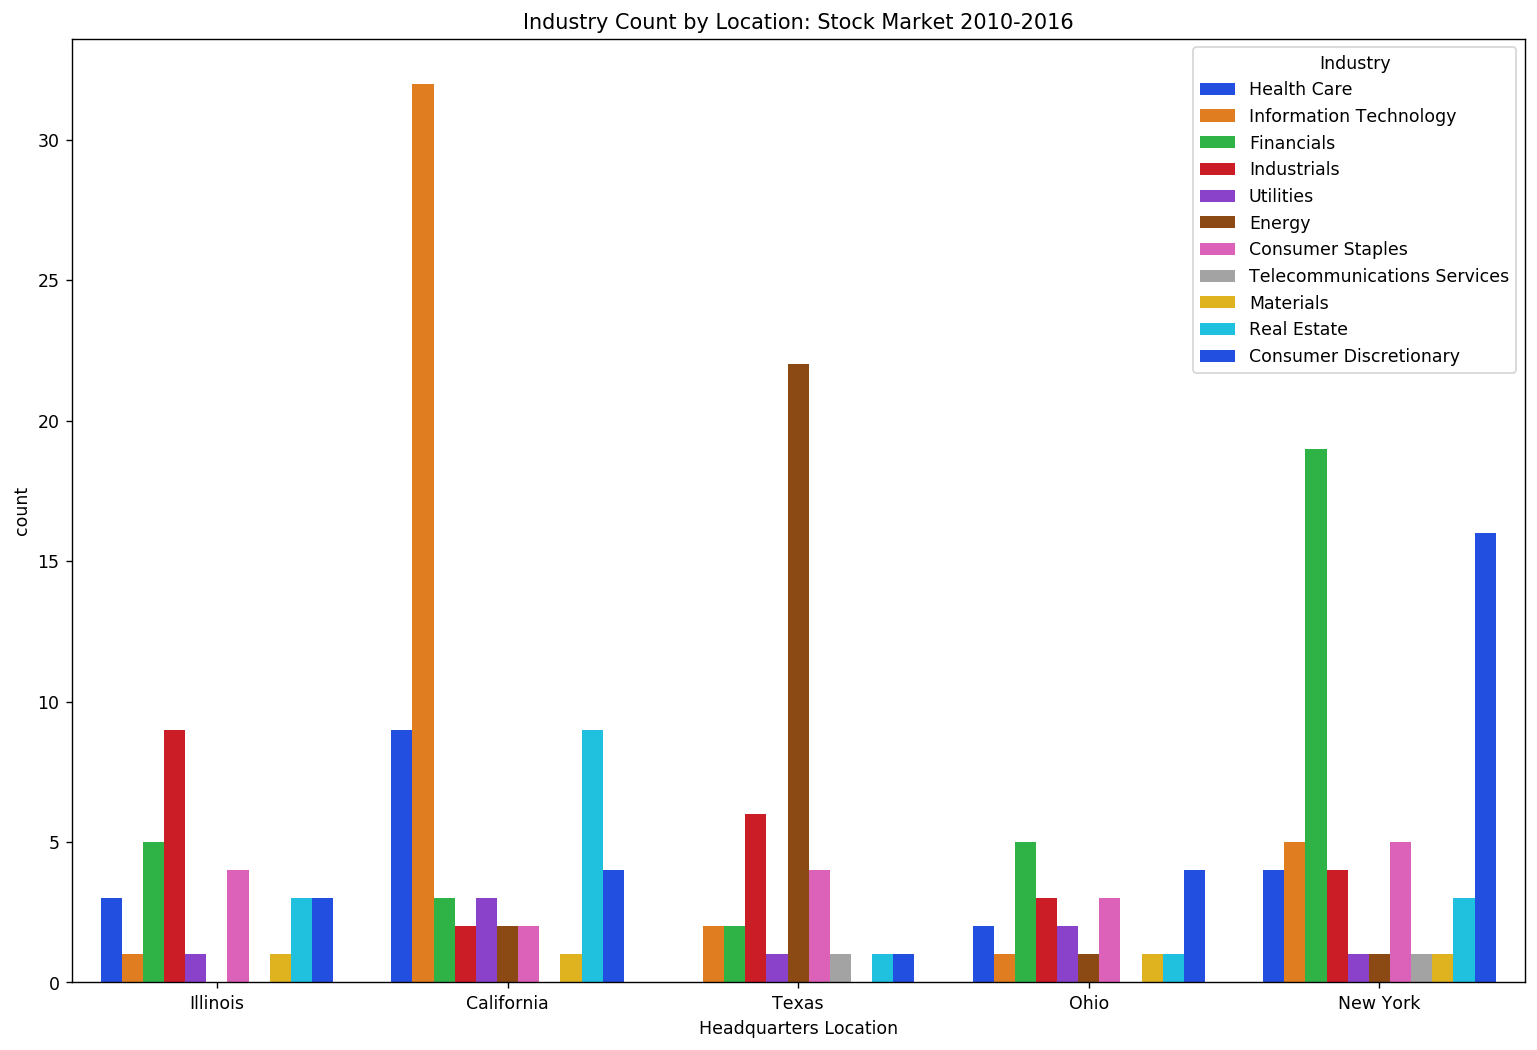

In [11]:
sec_by_pop_state = sec[sec['Headquarters Location'].isin(['California', 'New York', 'Texas', 'Illinois', 'Ohio'])]
fig = plt.figure(figsize=(15,10),dpi=125)
ax=sns.countplot('Headquarters Location',data=sec_by_pop_state, hue = 'GICS Sector',palette='bright')
ax.set_title('Industry Count by Location: Stock Market 2010-2016')
ax.legend(title='Industry')

Aha! Now we can see that a majority of companies are based in California, New York, Texas and Illinois

### Summary of Securities
   - 505 unique companies
   - 11 Main Industries
   - Companies Headquarters mainly located in California, New York, Texas, Illinois
       - California is best known for companies in Information Technology (though real estate is high relative to others)
       - Texas has a lot of companies that are in Energy
       - New York has a good amount of financial companies and consumer discretionary
   - Usefulness:
       - Look into certain industries by state.
       - Could be an indicator of whether to buy,hold for certain industries dependent on how industries do in a state

## Prices-split-adjusted

In this table we are given the stock market data of **501** companies. Characteristics are below
   - Index: Dates spanning from 2010 to 2016 (date)
   - symbol: 1-5 letter symbol representative of a company (string)
   - open: opening price of stock (float)
   - close: closing price of stock (float)
   - low: lowest selling point for the stock (float)
   - high: highest selling point for the stock (float)
   - volume: amount of stocks traded (integer)
   - Numeric data aggregrated on a day-to-day basis

In [12]:
prices = pd.read_csv('data/prices-split-adjusted.csv',parse_dates=True,index_col=0)
prices.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [13]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [14]:
prices.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,6.499362e+01,7.520389e+01,1.66,3.127000e+01,4.846000e+01,7.512000e+01,1.584440e+03
close,851264.0,6.501191e+01,7.520122e+01,1.59,3.129278e+01,4.848000e+01,7.514000e+01,1.578130e+03
low,851264.0,6.433654e+01,7.445952e+01,1.50,3.094000e+01,4.797000e+01,7.440000e+01,1.549940e+03
high,851264.0,6.563975e+01,7.590686e+01,1.81,3.162000e+01,4.896000e+01,7.585000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


Preliminary analysis shows that we have **no missing values** and **six years** worth of data. This analysis differs from our last table analysis because we are dealing with **time-series data.**

In [15]:
# Check what companies we have available based on the 'symbol' column
companies = [company for company in prices['symbol'].unique()]
print(f'{len(companies)} Companies present')
print()
for index, company in enumerate(companies):
      print(index,company)

501 Companies present

0 WLTW
1 A
2 AAL
3 AAP
4 AAPL
5 ABC
6 ABT
7 ACN
8 ADBE
9 ADI
10 ADM
11 ADP
12 ADS
13 ADSK
14 AEE
15 AEP
16 AES
17 AET
18 AFL
19 AGN
20 AIG
21 AIZ
22 AJG
23 AKAM
24 ALB
25 ALK
26 ALL
27 ALXN
28 AMAT
29 AME
30 AMG
31 AMGN
32 AMP
33 AMT
34 AMZN
35 AN
36 ANTM
37 AON
38 APA
39 APC
40 APD
41 APH
42 ARNC
43 ATVI
44 AVB
45 AVGO
46 AVY
47 AWK
48 AXP
49 AYI
50 AZO
51 BA
52 BAC
53 BAX
54 BBBY
55 BBT
56 BBY
57 BCR
58 BDX
59 BEN
60 BHI
61 BIIB
62 BK
63 BLK
64 BLL
65 BMY
66 BSX
67 BWA
68 BXP
69 C
70 CA
71 CAG
72 CAH
73 CAT
74 CB
75 CBG
76 CBS
77 CCI
78 CCL
79 CELG
80 CERN
81 CF
82 CHD
83 CHK
84 CHRW
85 CI
86 CINF
87 CL
88 CLX
89 CMA
90 CMCSA
91 CME
92 CMG
93 CMI
94 CMS
95 CNC
96 CNP
97 COF
98 COG
99 COH
100 COL
101 COO
102 COP
103 COST
104 CPB
105 CRM
106 CSCO
107 CSX
108 CTAS
109 CTL
110 CTSH
111 CTXS
112 CVS
113 CVX
114 CXO
115 D
116 DAL
117 DD
118 DE
119 DFS
120 DG
121 DGX
122 DHI
123 DHR
124 DIS
125 DISCA
126 DISCK
127 DLR
128 DLTR
129 DNB
130 DOV
131 DOW
132 DPS
133 DRI
1

In [16]:
# I chose to work with MSI for this analysis
# MSI is an information technology corporation
# based in New York State

msi_stock = prices[prices['symbol']=='MSI']
msi_stock

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,MSI,31.854686,32.218503,31.814265,32.420632,7511700.0
2010-01-05,MSI,32.137661,31.773836,31.207890,33.390824,18863900.0
2010-01-06,MSI,32.339782,32.218503,31.854686,32.501482,12137000.0
2010-01-07,MSI,32.380211,32.865299,32.218503,33.107849,13517500.0
2010-01-08,MSI,32.703611,31.369590,31.248319,32.824878,18596000.0
...,...,...,...,...,...,...
2016-12-23,MSI,83.620003,83.410004,83.209999,83.800003,399900.0
2016-12-27,MSI,83.410004,83.519997,83.389999,84.070000,477000.0
2016-12-28,MSI,83.599998,82.860001,82.739998,83.730003,323300.0


In [17]:
msi_stock.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1762.0,5.498719e+01,1.401167e+01,25.184601,4.572000e+01,5.836000e+01,6.556500e+01,8.412000e+01
close,1762.0,5.504117e+01,1.401682e+01,24.861201,4.566750e+01,5.849500e+01,6.561750e+01,8.400000e+01
low,1762.0,5.455420e+01,1.399653e+01,24.416534,4.525000e+01,5.804500e+01,6.519750e+01,8.371000e+01
high,1762.0,5.547701e+01,1.403637e+01,25.669705,4.608500e+01,5.891500e+01,6.609000e+01,8.755000e+01
volume,1762.0,2.863715e+06,2.855420e+06,249500.000000,1.208600e+06,1.864550e+06,3.371200e+06,3.289570e+07


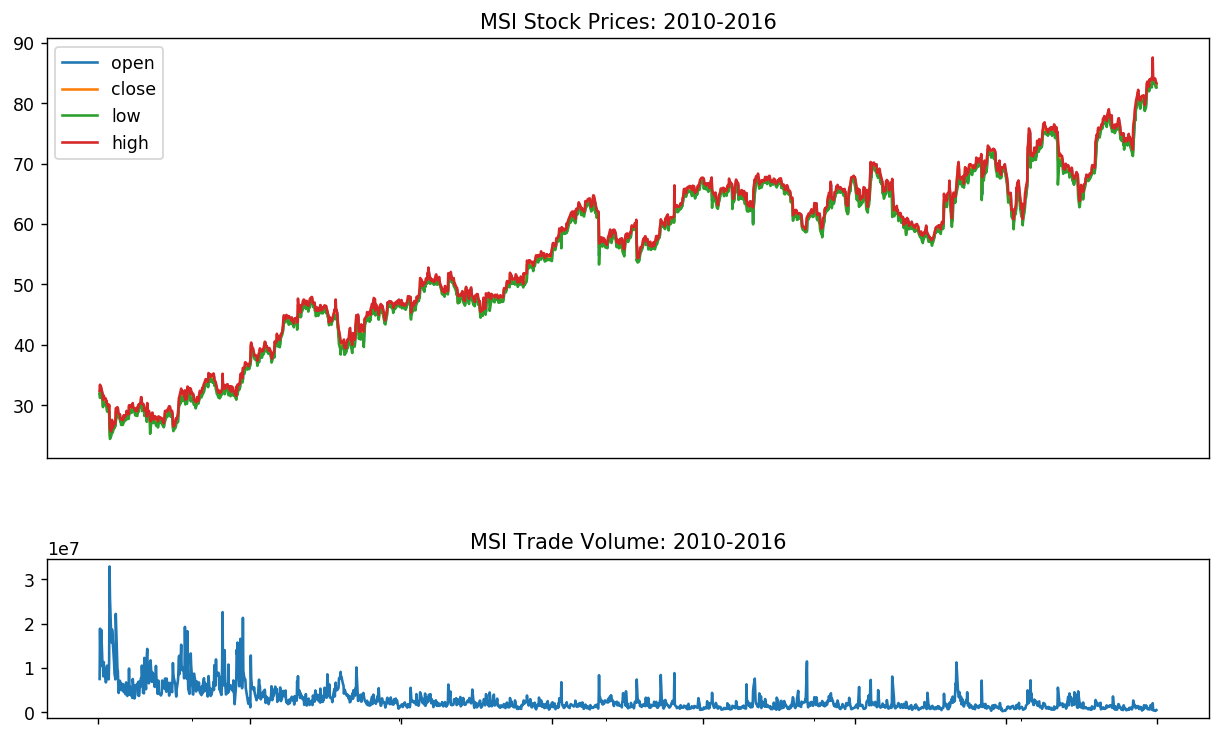

In [18]:
# Here we will be plotting our stock data in the subplot pabel
# volume data will go in the bottom subplot panel

# Create a canvas for us to work with
fig = plt.figure(figsize=(12,8),dpi=125)



# axes 1
ax1 = plt.subplot2grid(shape=(8,1),loc=(6,0),rowspan=2,colspan=1)
ax1.set_title('MSI Trade Volume: 2010-2016')

# axes 2
ax2 = plt.subplot2grid(shape=(8,1),loc=(0,0),rowspan=5,colspan=1,sharex=ax1)
ax2.xaxis.set_visible(False)
ax2.set_title('MSI Stock Prices: 2010-2016')

# plot axes 1
msi_stock.loc[:,'volume'].plot(ax=ax1,rot=0)
plt.xticks(ha='center');

# plot axes 2
msi_stock.drop(['volume','symbol'],axis=1).plot(ax=ax2)

In [19]:
# Lets choose another company
nvda_stock = prices[prices['symbol']=='NVDA']
nvda_stock

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0
2010-01-05,NVDA,18.420000,18.760000,18.420000,18.959999,18216200.0
2010-01-06,NVDA,18.750000,18.879999,18.570000,18.920000,16229200.0
2010-01-07,NVDA,18.780001,18.510000,18.370001,18.860001,13694800.0
2010-01-08,NVDA,18.360001,18.549999,18.250000,18.680000,11954200.0
...,...,...,...,...,...,...
2016-12-23,NVDA,106.379997,109.779999,106.269997,109.839996,16168700.0
2016-12-27,NVDA,112.059998,117.320000,111.220001,117.360001,29669800.0
2016-12-28,NVDA,119.599998,109.250000,108.690002,119.930000,57082600.0


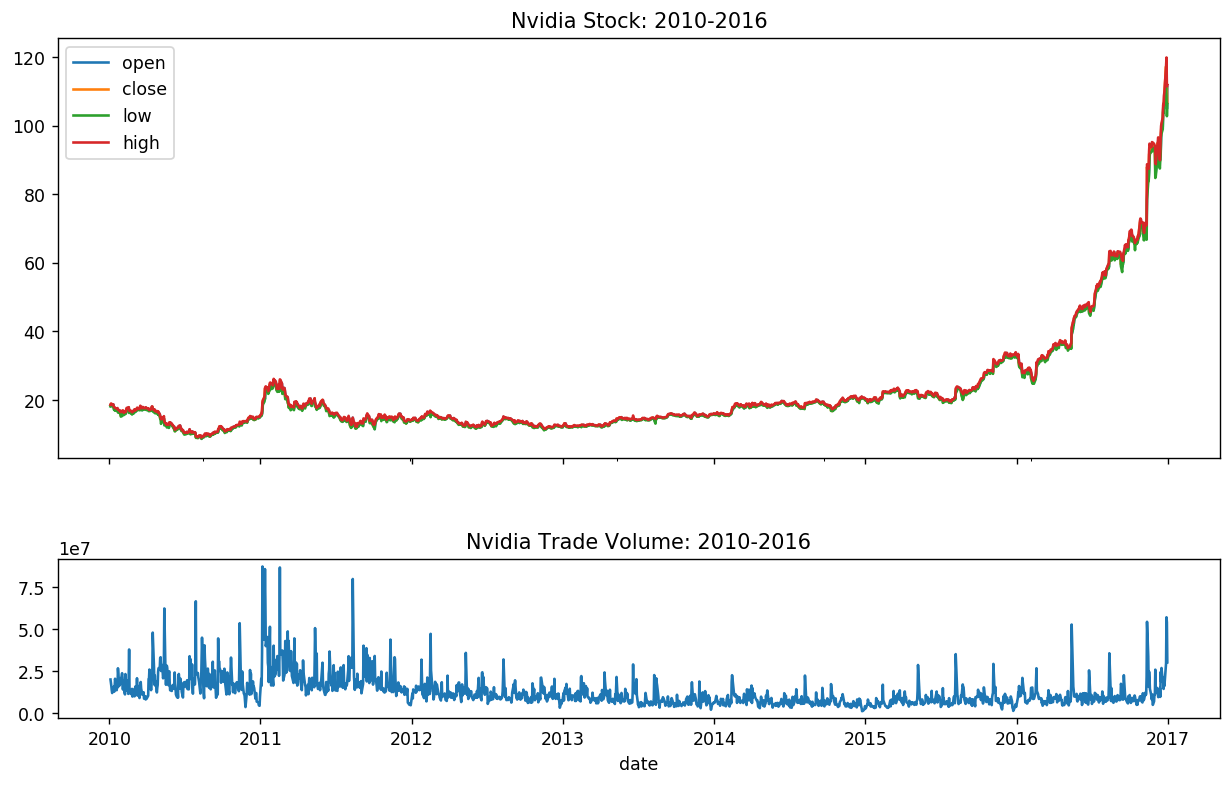

In [20]:
# Lets visualize Nvidia Stock

# Create Canvas
fig = plt.figure(figsize=(12,8),dpi=125)

# Axes 1
ax1= plt.subplot2grid(shape=(8,1),loc=(0,0),rowspan=5,colspan=1,sharex=ax2)
ax1.set_title('Nvidia Stock: 2010-2016')
# Axes 2
ax2 = plt.subplot2grid(shape=(8,1),loc=(6,0),rowspan=2,colspan=1)
ax2.set_title('Nvidia Trade Volume: 2010-2016')

# Plot Axes 1
nvda_stock.drop('volume',axis=1).plot(ax=ax1)

# Plot Axes 2
nvda_stock['volume'].plot(ax=ax2,rot=0)
plt.xticks(ha='center');

Nvidia stock goes up around the latter end of 2016. Doing some research, this is due to the release of the 1080 GPU.

Well its nice to have prices over such a long time frame, it doesn't do us very well in terms of aggregating data. This is because we have to look at the lowest level of granularity. One thing that we can do is check if a data column for companies are related to one another through correlation.

Text(0.5, 1, 'Correlation Plot by Company')

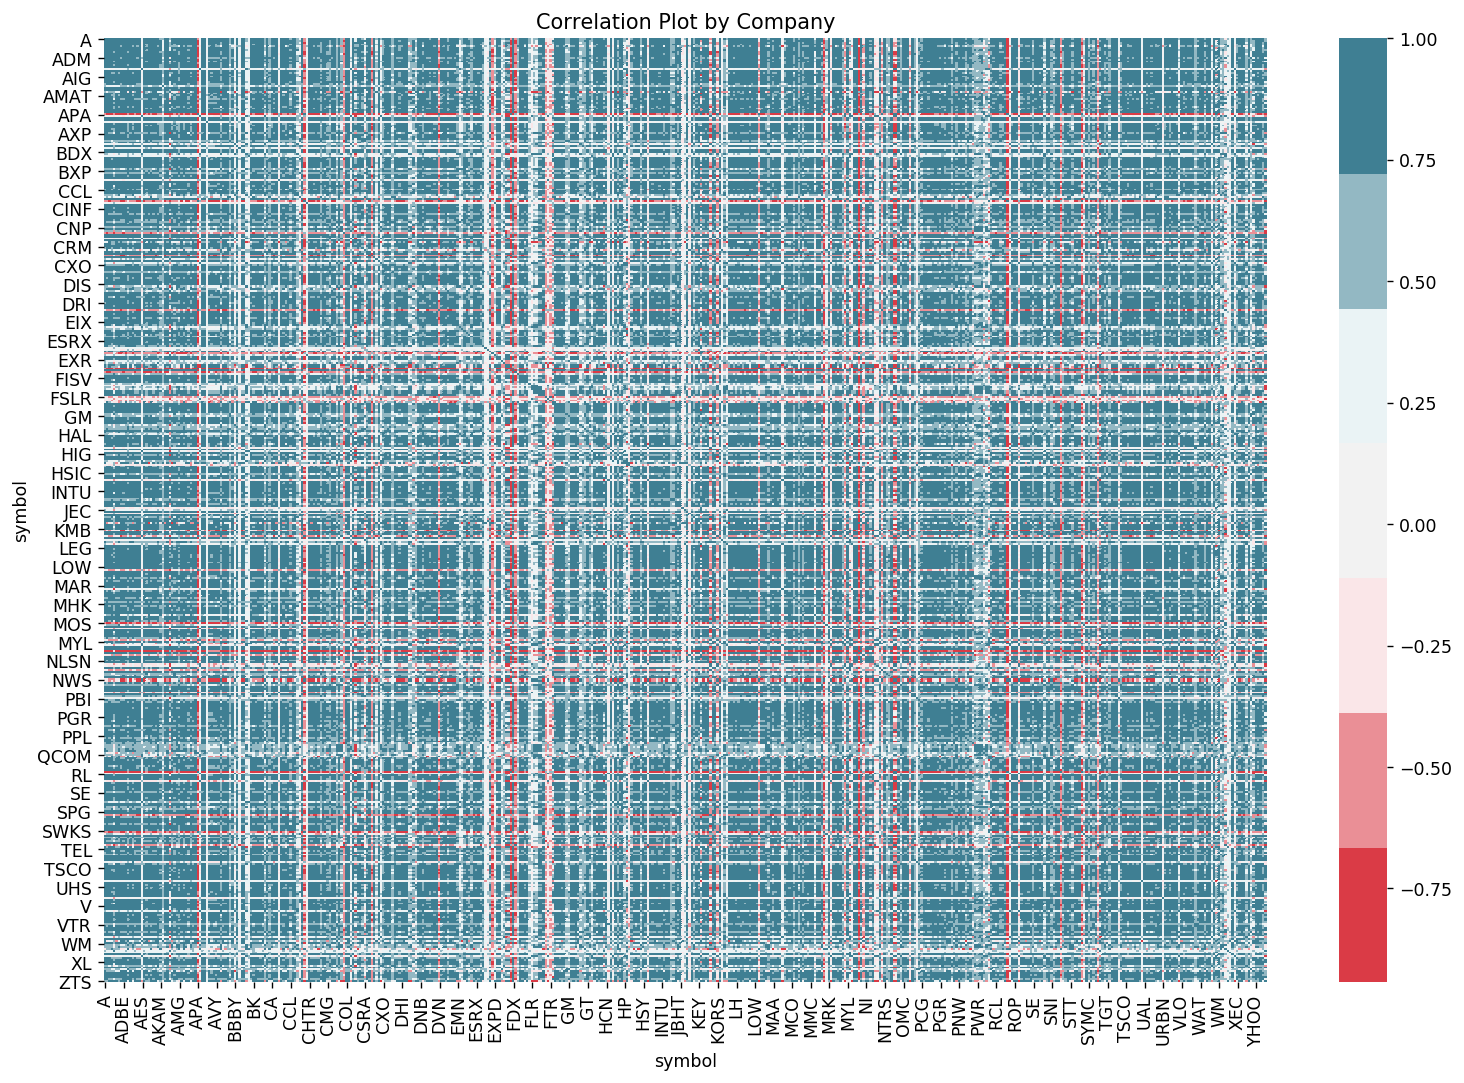

In [21]:
# Pivot our data to get it into the format we need for the correlation heatmap
close_prices = prices[['symbol','close']].pivot(columns='symbol',values='close')

# Create our heatmap figure
fig=plt.figure(figsize=(15,10),dpi=125)
ax = sns.heatmap(data=close_prices.corr(),cmap=sns.diverging_palette(10, 220, sep=80, n=7))
ax.set_title('Correlation Plot by Company')

Though it's hard to see, we can tell that some companies have a negative correlation with each other, some have a positive correlation with each other and companies have no correlation with each other. This can be useful information when exploring what stocks to buy.

### Prices-adjusted-split Summary
   - OHLC Stock Data for 501 Companies grabbed between 2010 to 2016
   - Correlation Plot used in reference to closing data to give relationship strength between companies
   
## Securities & Prices

This analysis will connect our two tables together to try and bring new insights into what we have already learned

In [22]:
# Create our merged dataframe
prices_joined_sec = pd.merge(prices.reset_index(), sec,
                             left_on='symbol', right_on='Ticker symbol').set_index('date')

# Drop the id that we joined on for the right table
prices_joined_sec.drop('Ticker symbol',axis=1,inplace=True)

# Print the first five rows
prices_joined_sec.head()

,symbol,open,close,low,high,volume,Security,SEC filings,GICS Sector,GICS Sub Industry,Date first added,CIK,Headquarters Location
date,,,,,,,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,Willis Towers Watson,reports,Financials,Insurance Brokers,1/5/2016,1140536,United Kingdom
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,Willis Towers Watson,reports,Financials,Insurance Brokers,1/5/2016,1140536,United Kingdom
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,Willis Towers Watson,reports,Financials,Insurance Brokers,1/5/2016,1140536,United Kingdom
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,Willis Towers Watson,reports,Financials,Insurance Brokers,1/5/2016,1140536,United Kingdom
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,Willis Towers Watson,reports,Financials,Insurance Brokers,1/5/2016,1140536,United Kingdom


In [23]:
# Print the info
prices_joined_sec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   symbol                 851264 non-null  object 
 1   open                   851264 non-null  float64
 2   close                  851264 non-null  float64
 3   low                    851264 non-null  float64
 4   high                   851264 non-null  float64
 5   volume                 851264 non-null  float64
 6   Security               851264 non-null  object 
 7   SEC filings            851264 non-null  object 
 8   GICS Sector            851264 non-null  object 
 9   GICS Sub Industry      851264 non-null  object 
 10  Date first added       505527 non-null  object 
 11  CIK                    851264 non-null  int64  
 12  Headquarters Location  851264 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 90.9+ MB


Now we have a table that we can do some fun time series analysis on! We can filter our data by sector or industry or headquarters location. For now, lets focus on volume traded by sector over a 10 day period by sector

In [24]:
# Group GICS Sector by the sum of traded volume resampled every 10 days
# pjs is shorthand for prices_joined_sec
pjs_vol_10d = prices_joined_sec[['GICS Sector','volume']].groupby('GICS Sector').resample('10D').sum()

# reset the index and set it back to date to get back
# a dataframe object
pjs_vol_10d = pjs_vol_10d.reset_index().set_index('date')


Text(0.5, 1.0, 'Volume Traded by GICS Sector: 2010-2016')

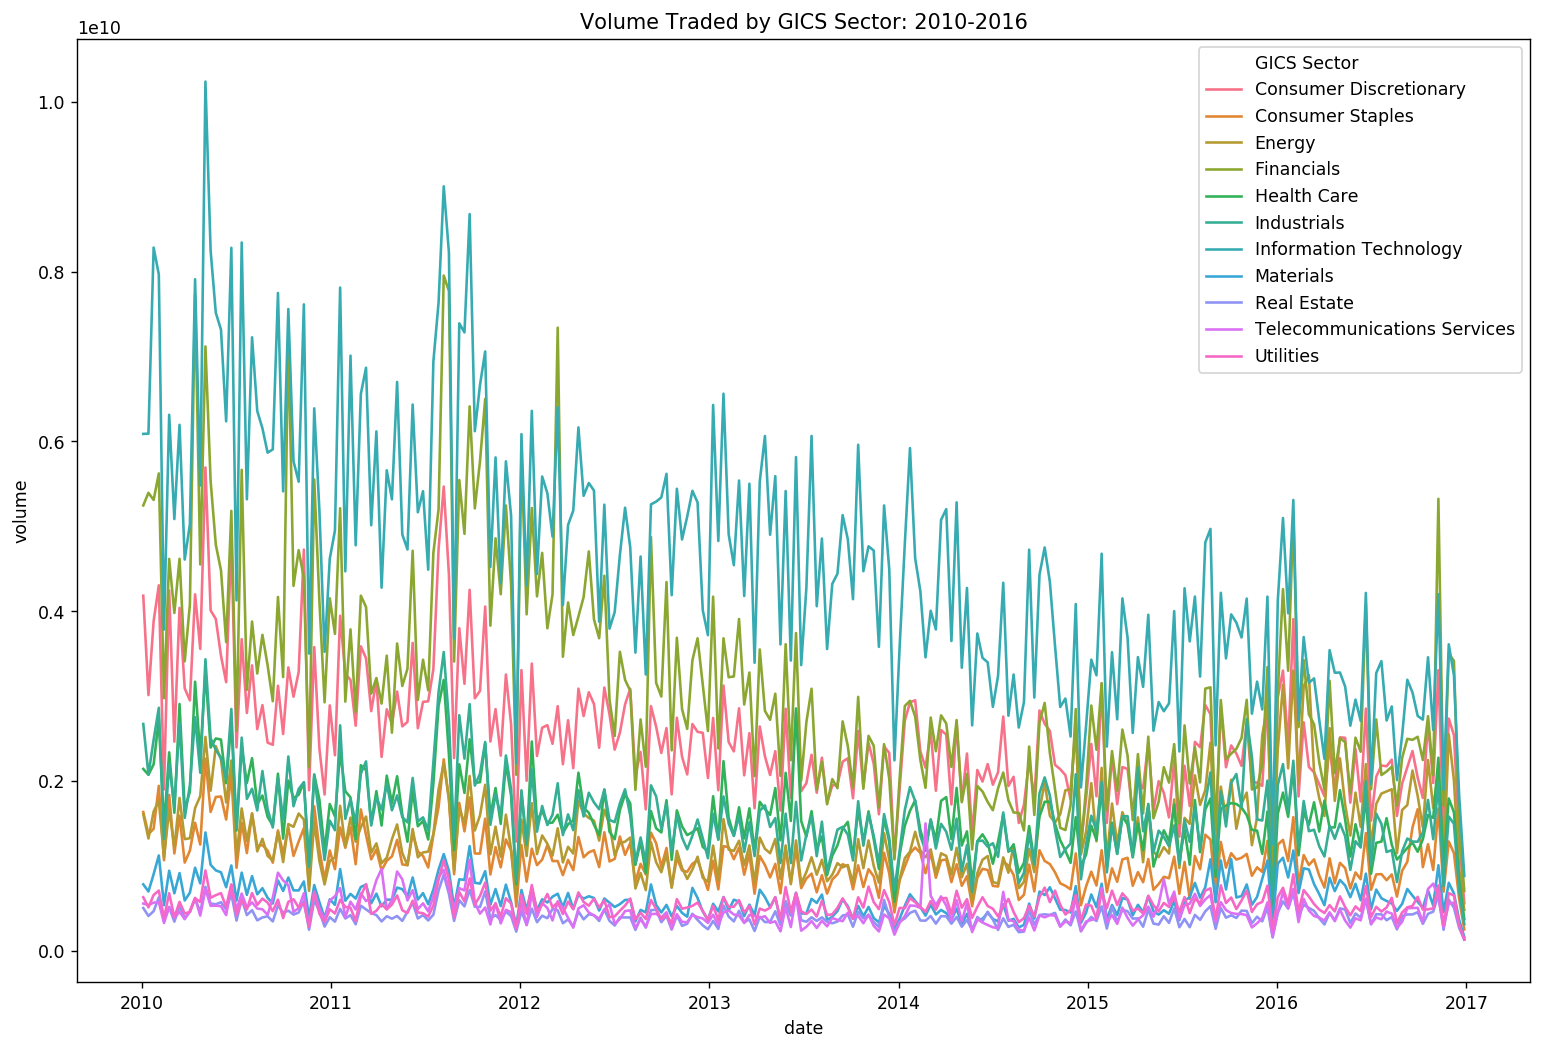

In [25]:
# Graph volume by sector over time
fig = plt.figure(figsize=(15,10),dpi=125)
ax = sns.lineplot(x = pjs_vol_10d.index, y='volume', data=pjs_vol_10d, hue = 'GICS Sector', 
                  palette='husl')
ax.set_title('Volume Traded by GICS Sector: 2010-2016')
# Just another color pallete to choose from 
# sns.color_palette("Paired",n_colors=vol_10d['GICS Sector'].nunique())

Not a financial person, I can only follow the graphs and numbers. It looks trading volume goes down by time, this can be attributed by different reasons. Thinking about using volume could be beneficial, however theres too much information right now on the board. Lets try whittling down information by industry.

In [26]:
pjs_vol_10d['GICS Sector'].unique()

array(['Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate',
       'Telecommunications Services', 'Utilities'], dtype=object)

In [27]:
pjs_vol_10d[pjs_vol_10d['GICS Sector'] == 'Health Care']

,GICS Sector,volume
date,,
2010-01-04,Health Care,2.143372e+09
2010-01-14,Health Care,2.074590e+09
2010-01-24,Health Care,2.198419e+09
2010-02-03,Health Care,2.730136e+09
2010-02-13,Health Care,1.464420e+09
...,...,...
2016-11-18,Health Care,9.891554e+08
2016-11-28,Health Care,1.795161e+09
2016-12-08,Health Care,1.633586e+09


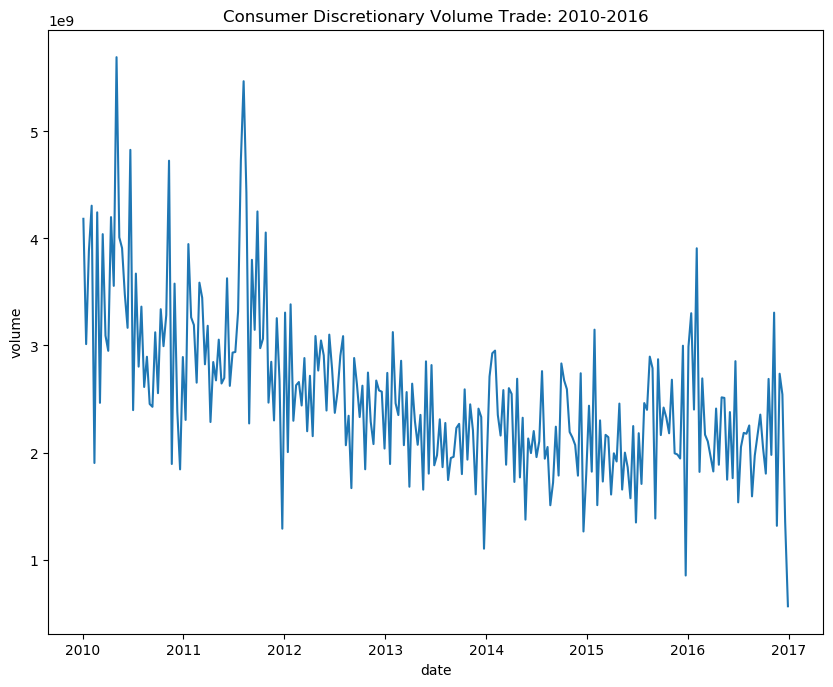

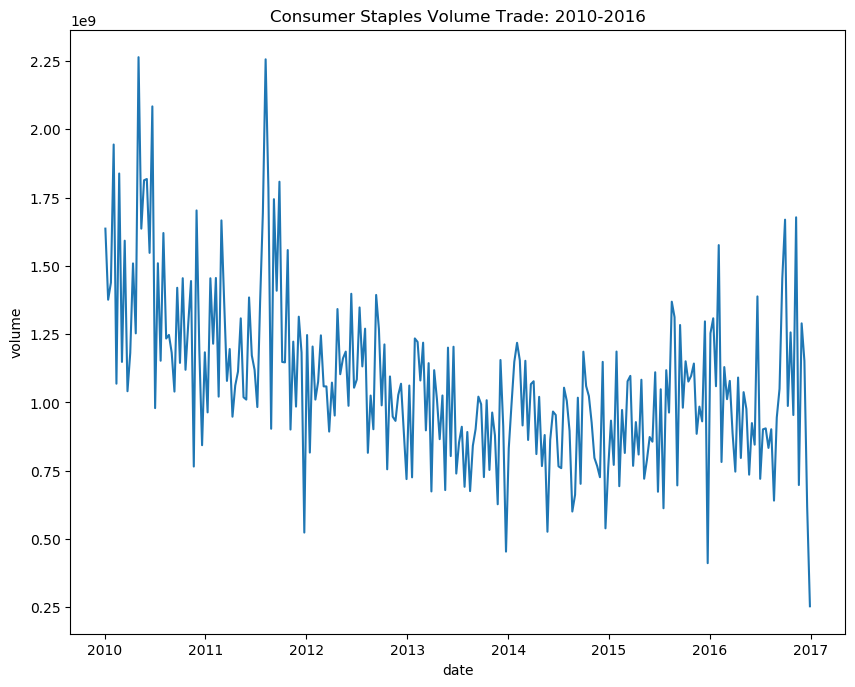

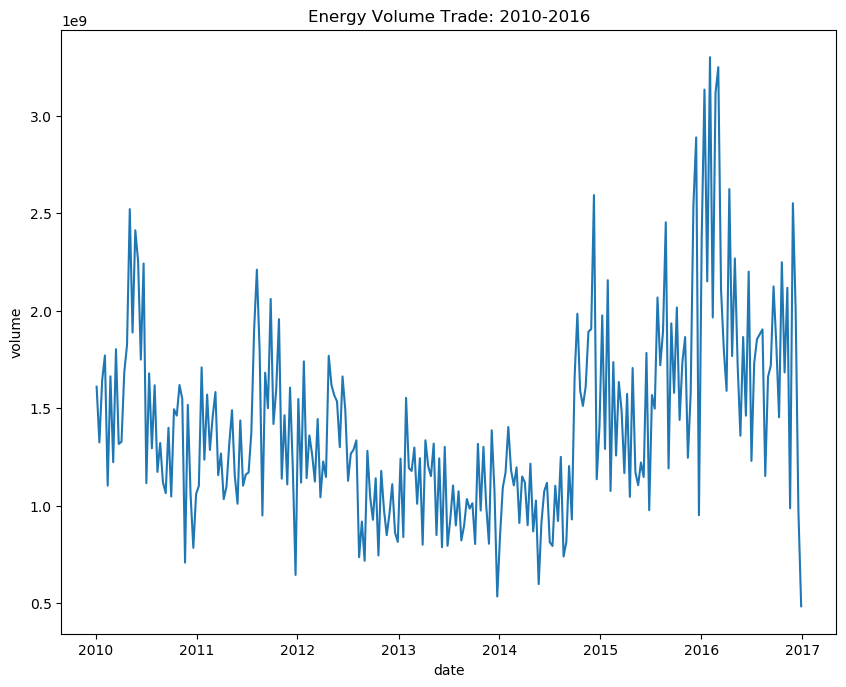

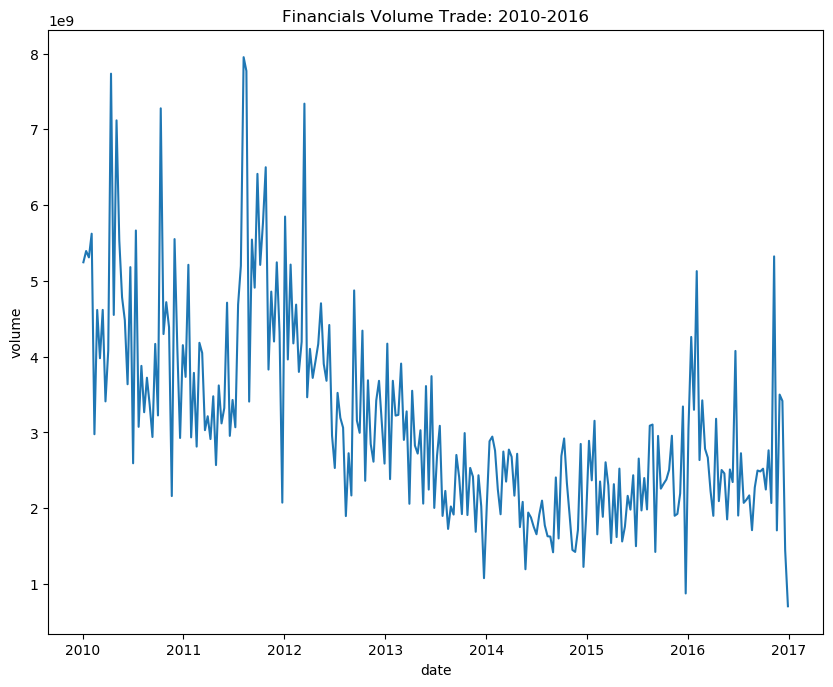

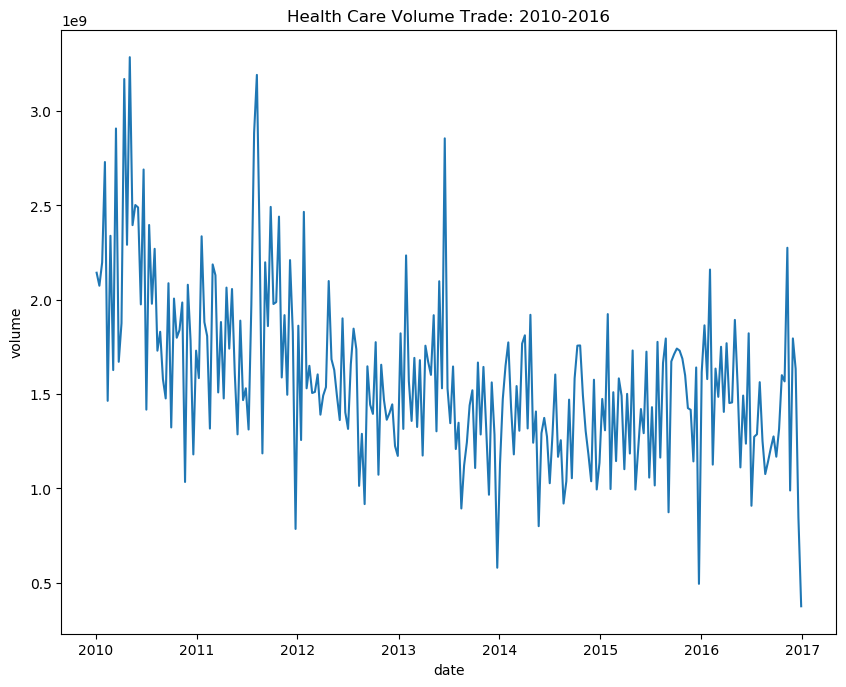

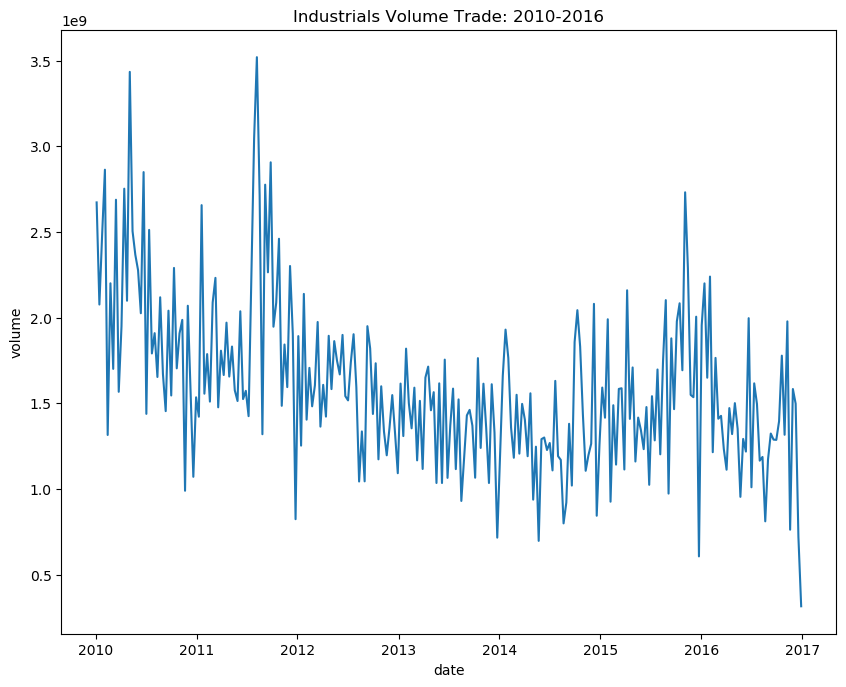

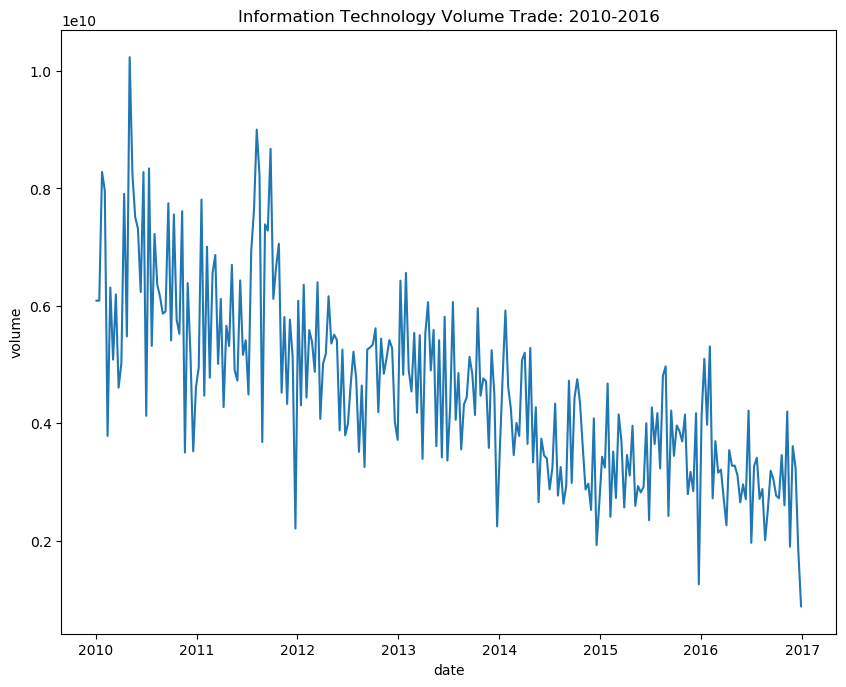

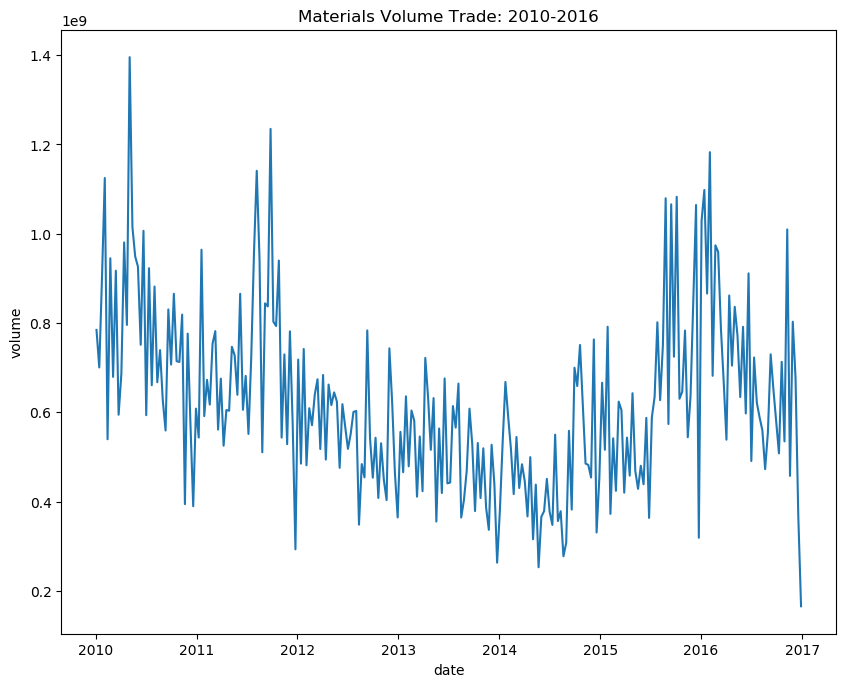

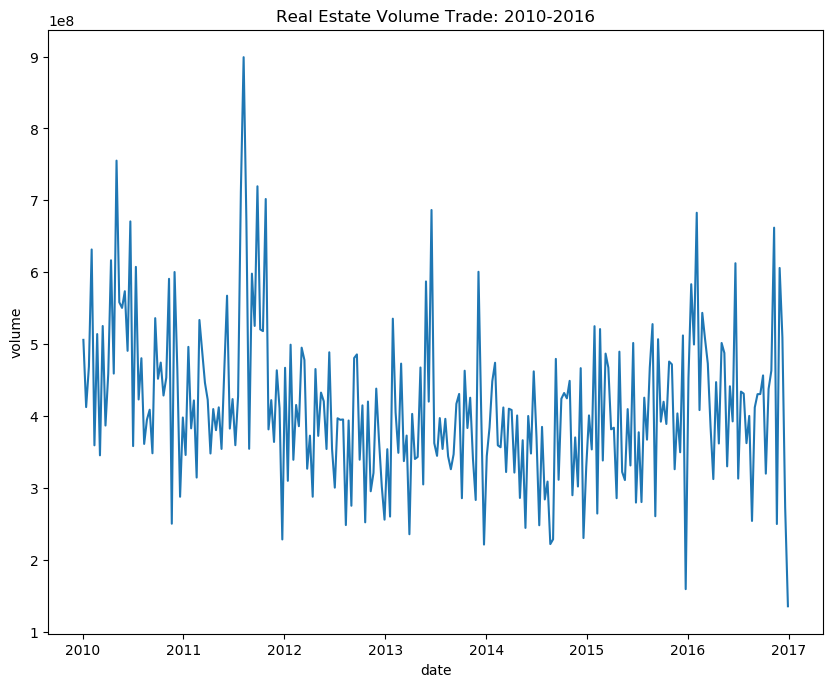

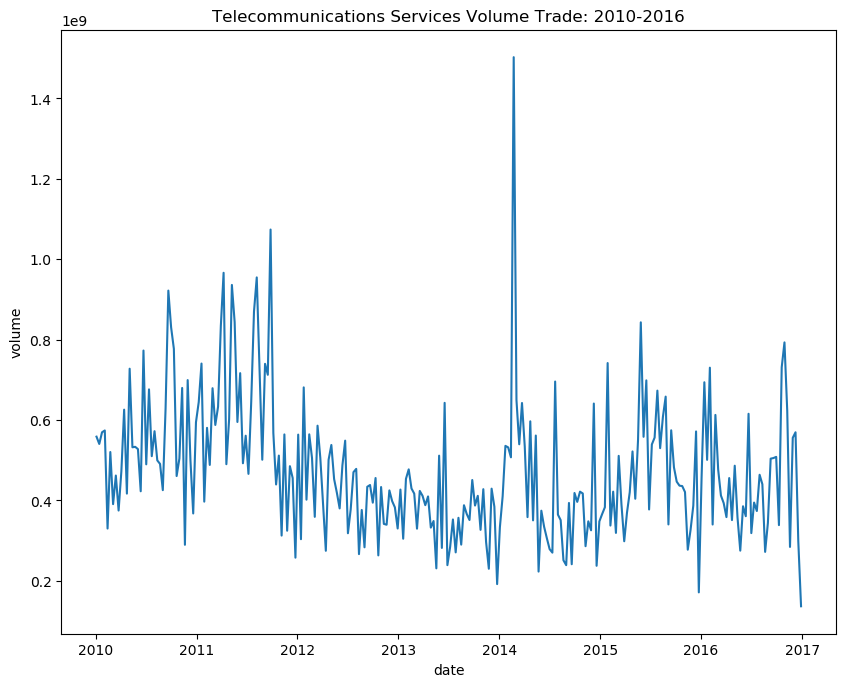

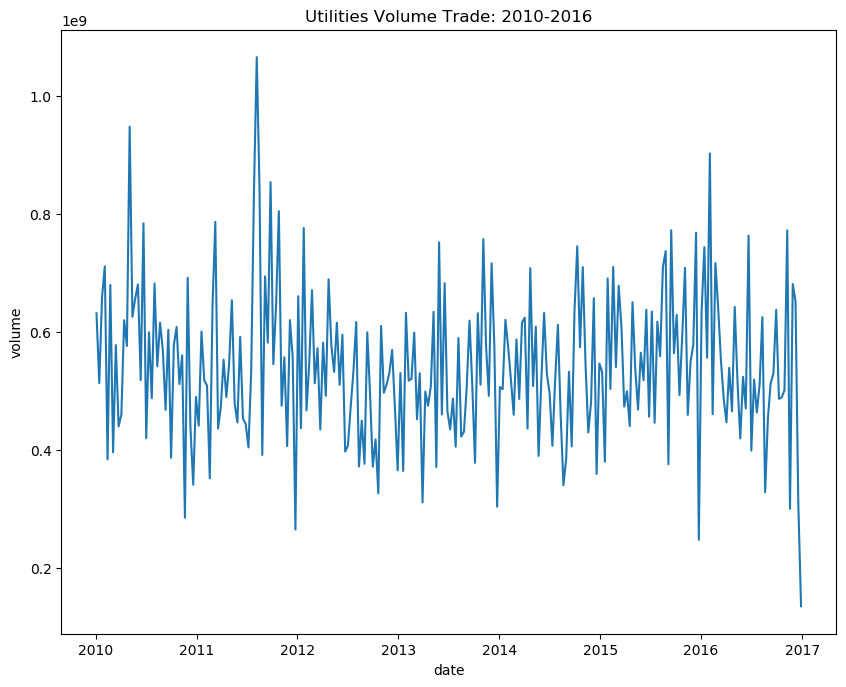

In [28]:
for index,sector in enumerate(pjs_vol_10d['GICS Sector'].unique()):
    # sector filter parameters
    filt = pjs_vol_10d['GICS Sector'] == sector
    data = pjs_vol_10d[filt]
    date = data.index

    # create canvas
    fig = plt.figure(num=index,figsize=(10,8),dpi=100)
    
    # plotting
    ax = sns.lineplot(x=date, y='volume', data=data)
    ax.set_title(f'{sector} Volume Trade: 2010-2016')
    

Now lets see if volume traded and sectors are related.

Text(0.5, 1, 'Correlation Plot: Volume Trading by Sector')

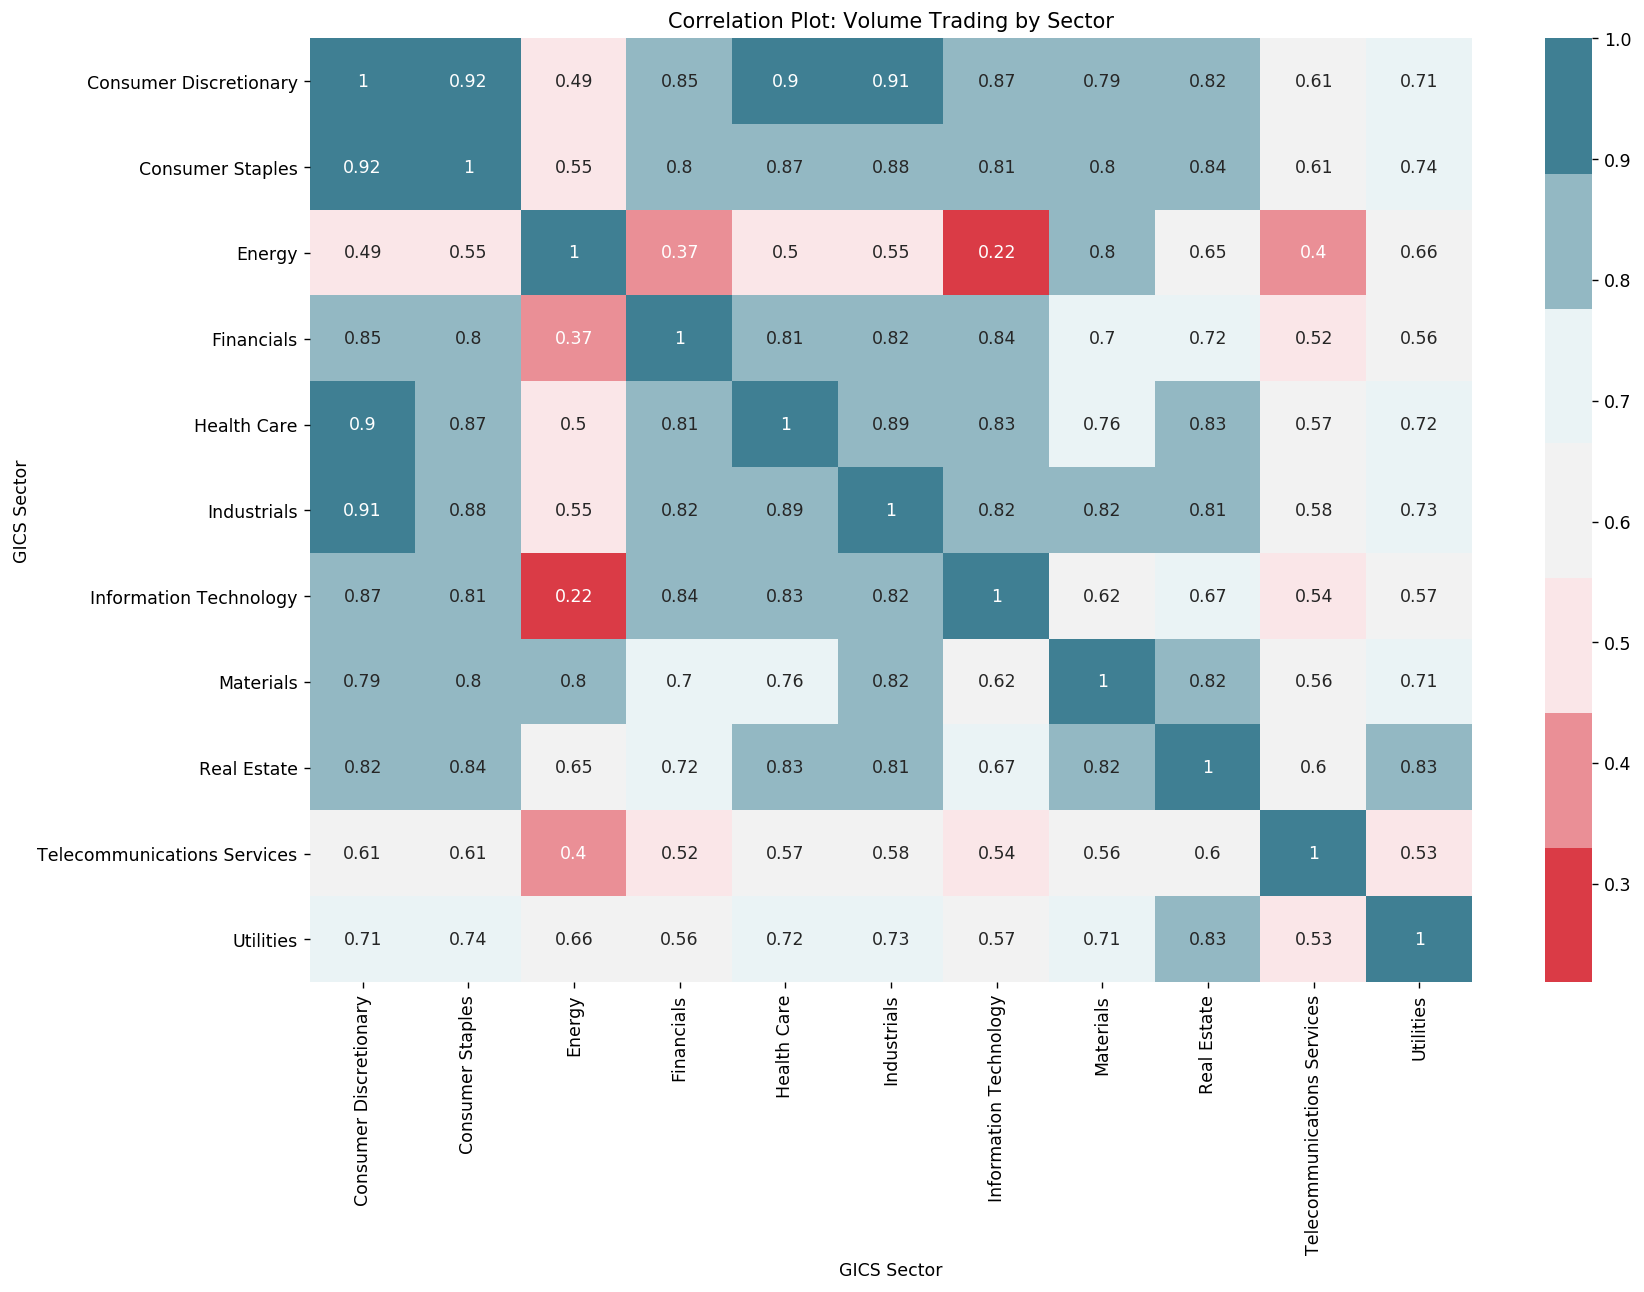

In [29]:
# Pivot our table, this could have been done by unstacking
# the original dataframe before we reset our index
pjs_vol_10d_pivot = pjs_vol_10d.pivot(columns='GICS Sector',values='volume')

# Create our heatmap figure
fig=plt.figure(figsize=(15,10),dpi=125)
ax=sns.heatmap(data=pjs_vol_10d_pivot.corr(),cmap=sns.diverging_palette(10, 220, sep=80, n=7),annot=True)
ax.set_title('Correlation Plot: Volume Trading by Sector')

Great! The information we have above is way more useful than our previous chart, and we can visualize sectors together by correlation or just graph sectors individually! Our correplation plot seems to corroborate with the a couple ideas. 
- Market usually moves foward with each other, though strengths can be varying
- We have no negatively correlated values

We may be able to extrapolate more data, however I'll move on for now.

In [30]:
sec['GICS Sector'].value_counts().index.to_list()

['Consumer Discretionary',
 'Industrials',
 'Information Technology',
 'Financials',
 'Health Care',
 'Consumer Staples',
 'Energy',
 'Real Estate',
 'Utilities',
 'Materials',
 'Telecommunications Services']

In [31]:
# Lets move on to another variable with high interest
# I would like to look at closing prices
# Lets keep sector, company and closing prices
# sampled over 10 days, 

pjs_close_10 = prices_joined_sec.loc[:,['GICS Sector','symbol','close']]
pjs_close_10 = pjs_close_10.groupby(['GICS Sector','symbol']).resample('10D').mean().reset_index().set_index('date')

# Create a 10 day moving average

pjs_close_10['10mac'] = pjs_close_10.loc[:,'close'].rolling(window=10,min_periods=0).mean()

# now we can look at specific sectors
# Sectors to choose from
# 'Consumer Discretionary'
# 'Industrials'
# 'Information Technology'
# 'Financials'
# 'Health Care'
# 'Consumer Staples'
# 'Energy'
# 'Real Estate'
# 'Utilities'
# 'Materials'
# 'Telecommunications Services'

# create a filter condition
# I chose healthcare
filt = pjs_close_10['GICS Sector'] == 'Health Care'
health_pjs_close_10 = pjs_close_10[filt]

# now we can drop the sector variable
# pivot by company where values are close and 10 mac
health_pjs_close_10.drop('GICS Sector',axis=1).pivot(columns='symbol',values=['close','10mac']) 

close                                               \
symbol              A       ABBV        ABC        ABT         AET   
date                                                                 
2010-01-04  22.056510        NaN  26.372500  26.293617   32.270001   
2010-01-14  21.781116        NaN  26.980000  26.656865   31.848333   
2010-01-24  20.770489        NaN  27.521429  25.892041   30.325714   
2010-02-03  21.010372        NaN  27.365000  25.781430   29.183750   
2010-02-13  22.061517        NaN  27.810000  26.205693   29.276000   
...               ...        ...        ...        ...         ...   
2016-12-16        NaN        NaN        NaN        NaN         NaN   
2016-12-18  46.060000        NaN  78.626666  38.346666  124.824999   
2016-12-22        NaN  62.353333        NaN        NaN         NaN   
2016-12-26        NaN        NaN        NaN        NaN         NaN   
2016-12-28  45.640000        NaN  78.626665  38.313334  124.346667   

                                                                       ...  \
symbol             AGN        ALXN        AMGN        ANTM        BAX  ...   
date                                                                   ...   
2010-01-04   39.961250   23.818750   56.793750   62.733750  32.009098  ...   
2010-01-14   40.881667   23.555834   56.731666   66.535000  32.940429  ...   
2010-01-24   38.842857   23.257143   57.791429   64.491429  31.741289  ...   
2010-02-03   38.168750   23.582500   57.346250   61.443750  30.636882  ...   
2010-02-13   38.912000   24.587000   57.188000   59.036000  31.205866  ...   
...                ...         ...         ...         ...        ...  ...   
2016-12-16         NaN         NaN         NaN         NaN        NaN  ...   
2016-12-18  195.238337  121.561666  147.233335  145.633334  44.265000  ...   
2016-12-22         NaN         NaN         NaN         NaN        NaN  ...   
2016-12-26         NaN         NaN         NaN         NaN        NaN  ...   
2016-12-28  207.093333  123.236666  147.220001  144.263331  44.263332  ...   

                 10mac                                                  \
symbol             SYK         TMO         UHS         UNH         VAR   
date                                                                     
2010-01-04  346.070714  108.653970  134.557550  108.795297  140.811673   
2010-01-14  313.930976  102.021542  122.317859   99.855083  132.056054   
2010-01-24  282.779138   95.388381  110.305841   90.925012  122.680554   
2010-02-03  253.318971   88.488547   98.600633   82.100262  113.527054   
2010-02-13  217.041296   82.135497   86.724682   73.155562  103.574429   
...                ...         ...         ...         ...         ...   
2016-12-16         NaN         NaN         NaN         NaN         NaN   
2016-12-18  115.104328  148.654705  119.312416  147.710388   93.035629   
2016-12-22         NaN         NaN         NaN         NaN         NaN   
2016-12-26         NaN         NaN         NaN         NaN         NaN   
2016-12-28  115.449077  147.205871  117.674333  149.825263   92.276587   

                                                                      
symbol           VRTX         WAT        XRAY         ZBH        ZTS  
date                                                                  
2010-01-04  86.585658   78.595685  130.127250   59.378226        NaN  
2010-01-14  80.971563   76.506637  118.085535   59.740798        NaN  
2010-01-24  75.371724   74.355708  106.670107   59.843351        NaN  
2010-02-03  70.199724   72.260917   96.191149   59.533685        NaN  
2010-02-13  65.281574   69.005367   85.368199   59.314734        NaN  
...               ...         ...         ...         ...        ...  
2016-12-16        NaN         NaN         NaN         NaN        NaN  
2016-12-18  82.678941  144.638190   59.232589  112.489637        NaN  
2016-12-22        NaN         NaN         NaN         NaN  50.903279  
2016-12-26        NaN         NaN         NaN        

The above format is the ideal format we would like for machine learning processing, however, unless we want to view individual companies, it's hard to do any sort of data analysis on this. We are beginning to approach levels of granularity that get into the fine detail of stocks, however this Notebook is meant to be more of a general exploration of the data. Let's move onto headquarters location exploration and see if that matters for stocks, an idea put forward by several papers ([here<sup>3</sup>](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.2006.00895.x) is one).

In [32]:
# Dataframe for volume grouped by industry for each location
headquart_pjs_vol_10d = prices_joined_sec[['Headquarters Location', 'GICS Sector', 'volume']]\
                           .groupby(['Headquarters Location', 'GICS Sector']).resample('10D').sum()\
                                .reset_index().set_index('date')

# Now we can filter by headquarter location
# or by sector. Lets remind ourselves
# of our filtering options

print('{} Headquarter Choices'.format(headquart_pjs_vol_10d['Headquarters Location'].nunique()))
print()
print(headquart_pjs_vol_10d['Headquarters Location'].unique().tolist())
print()
print('{} Sector Choices'.format(headquart_pjs_vol_10d['GICS Sector'].nunique()))
print()
sector_choices = headquart_pjs_vol_10d['GICS Sector'].unique().tolist()
print(headquart_pjs_vol_10d['GICS Sector'].unique().tolist())

49 Headquarter Choices

['Alabama', 'Arizona', 'Arkansas', 'Bermuda', 'California', 'Colorado', 'Connecticut', 'D.C.', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Ireland', 'Kent', 'Kentucky', 'Kingdom of the Netherlands', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'NY', 'Nebraska', 'Netherlands', 'Nevada', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Switzerland', 'Tennessee', 'Texas', 'UK', 'UT', 'United Kingdom', 'Utah', 'Virginia', 'Washington', 'Wisconsin']

11 Sector Choices

['Financials', 'Materials', 'Industrials', 'Information Technology', 'Utilities', 'Consumer Staples', 'Energy', 'Consumer Discretionary', 'Health Care', 'Real Estate', 'Telecommunications Services']


I, however, only want to do plots for the top five locations that have the most healthcare companies

In [97]:
# Grab the top five locations from sec

# filtering condition for healthcare
filt = sec['GICS Sector'] == 'Health Care'

# create a throwaway variable foo
foo = sec[filt].loc[:,('GICS Sector','Headquarters Location')]

# Since each row represents a unique company
# Lets aggregrate against a count
# grab the top five headquarter locations
five_health_loc = foo.groupby(['Headquarters Location']).size().sort_values(ascending=False).head().index.to_list()
five_health_loc

['California', 'Massachusetts', 'New Jersey', 'Ireland', 'New York']

In [110]:
pjs_health['Headquarters Location'].isin(five_health_loc)

date
2010-01-04     True
2010-01-05     True
2010-01-06     True
2010-01-07     True
2010-01-08     True
              ...  
2016-12-23    False
2016-12-27    False
2016-12-28    False
2016-12-29    False
2016-12-30    False
Name: Headquarters Location, Length: 99898, dtype: bool

In [111]:
# lets go ahead and plot volume by these locations overtime
filt = (pjs_health['GICS Sector'] == 'Health Care') & (pjs_health['Headquarters Location'].isin(five_health_loc))

# Lets see what it looks like
pjs_health[filt].head()

,symbol,open,close,low,high,volume,Security,SEC filings,GICS Sector,GICS Sub Industry,Date first added,CIK,Headquarters Location
date,,,,,,,,,,,,,
2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,NaN,1090872,California
2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,NaN,1090872,California
2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,NaN,1090872,California
2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,NaN,1090872,California
2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,NaN,1090872,California


In [133]:
# Create out volume by headquarters location
pjs_health_vol = pjs_health[filt].loc[:, ('volume', 'Headquarters Location')]
pjs_health_vol = pjs_health_vol.groupby('Headquarters Location').resample('10D').sum().reset_index()
pjs_health_vol.head()

,Headquarters Location,date,volume
0,California,2010-01-04,338841500.0
1,California,2010-01-14,243487800.0
2,California,2010-01-24,352652600.0
3,California,2010-02-03,378512400.0
4,California,2010-02-13,228525200.0
...,...,...,...
1275,New York,2016-11-18,161553100.0
1276,New York,2016-11-28,308359400.0
1277,New York,2016-12-08,306135300.0
1278,New York,2016-12-18,147255500.0


Headquarters Location
California       9
Massachusetts    7
New Jersey       7
Ireland          5
New York         4
dtype: int64


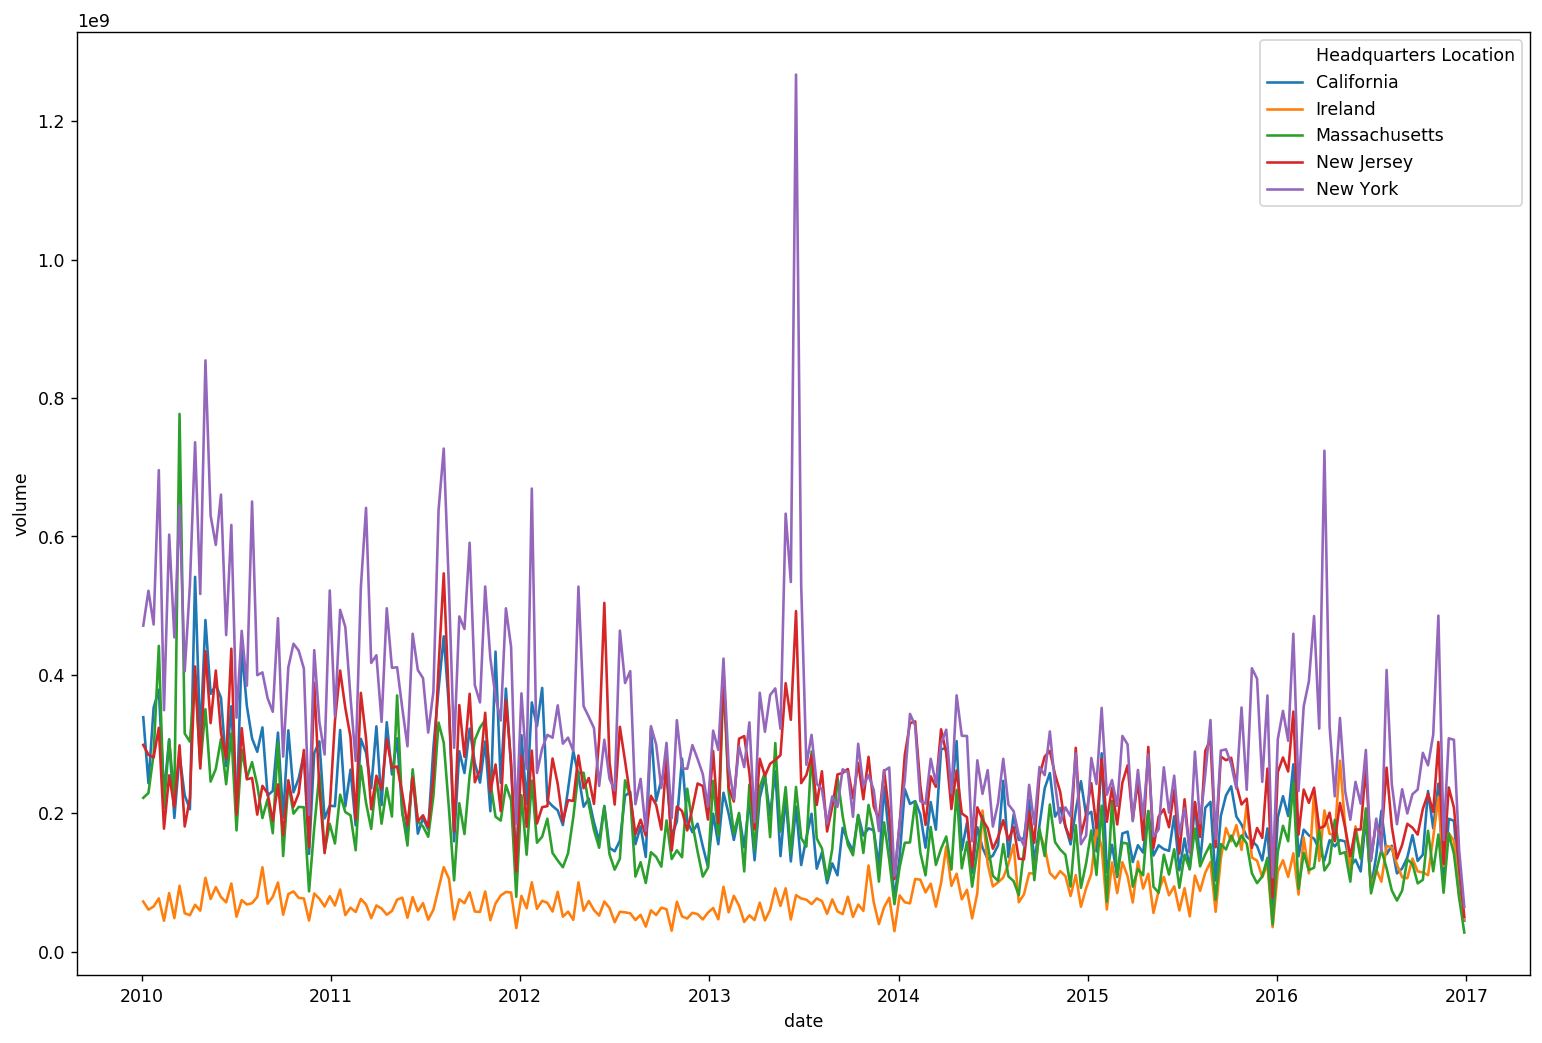

In [137]:
fig = plt.figure(figsize=(15,10),dpi=125)
ax = sns.lineplot(x='date',y='volume',data=pjs_health_vol,hue='Headquarters Location')
print(foo.groupby(['Headquarters Location']).size().sort_values(ascending=False).head())

Interesting, I thought I would have seen more volume come out of California due to the number of Health Care companies being bigger. However, this could be attributed to several different reasons. The health care providers in California could be in a different sub-industry than the one in New York.

# References

1. [New York Stock Exchange](https://www.kaggle.com/dgawlik/nyse/data#)

2. 

3. [Does Corporate Headquarters Location Matter for Stock Returns?](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.2006.00895.x)